In [33]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


In [34]:
dt_house = pd.read_csv('./price_house_train.csv').fillna(0)
dt_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [55]:
mcor = dt_house.corr(numeric_only= True)
mcor = mcor.round(4)
mcor.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0000,0.0112,-0.0198,-0.0332,-0.0284,0.0126,-0.0127,-0.0220,-0.0511,-0.0050,...,-0.0296,-0.0005,0.0029,-0.0466,0.0013,0.0570,-0.0062,0.0212,0.0007,-0.0219
MSSubClass,0.0112,1.0000,-0.2150,-0.1398,0.0326,-0.0593,0.0279,0.0406,0.0236,-0.0698,...,-0.0126,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0843
LotFrontage,-0.0198,-0.2150,1.0000,0.1007,0.1766,-0.0535,0.0369,0.0787,0.1050,0.0767,...,-0.0168,0.0696,0.0274,0.0235,0.0230,0.1141,-0.0596,0.0189,-0.0121,0.2096
LotArea,-0.0332,-0.1398,0.1007,1.0000,0.1058,-0.0056,0.0142,0.0138,0.1033,0.2141,...,0.1717,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2638
OverallQual,-0.0284,0.0326,0.1766,0.1058,1.0000,-0.0919,0.5723,0.5507,0.4073,0.2397,...,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.7910


In [75]:
def _show_heastmap(dtframe):
    sb.set(rc={'figure.figsize': (15,12)})
    mcplot = sb.heatmap(dtframe,cmap="Reds", annot=False, linewidths=0.8, annot_kws={"size":7})

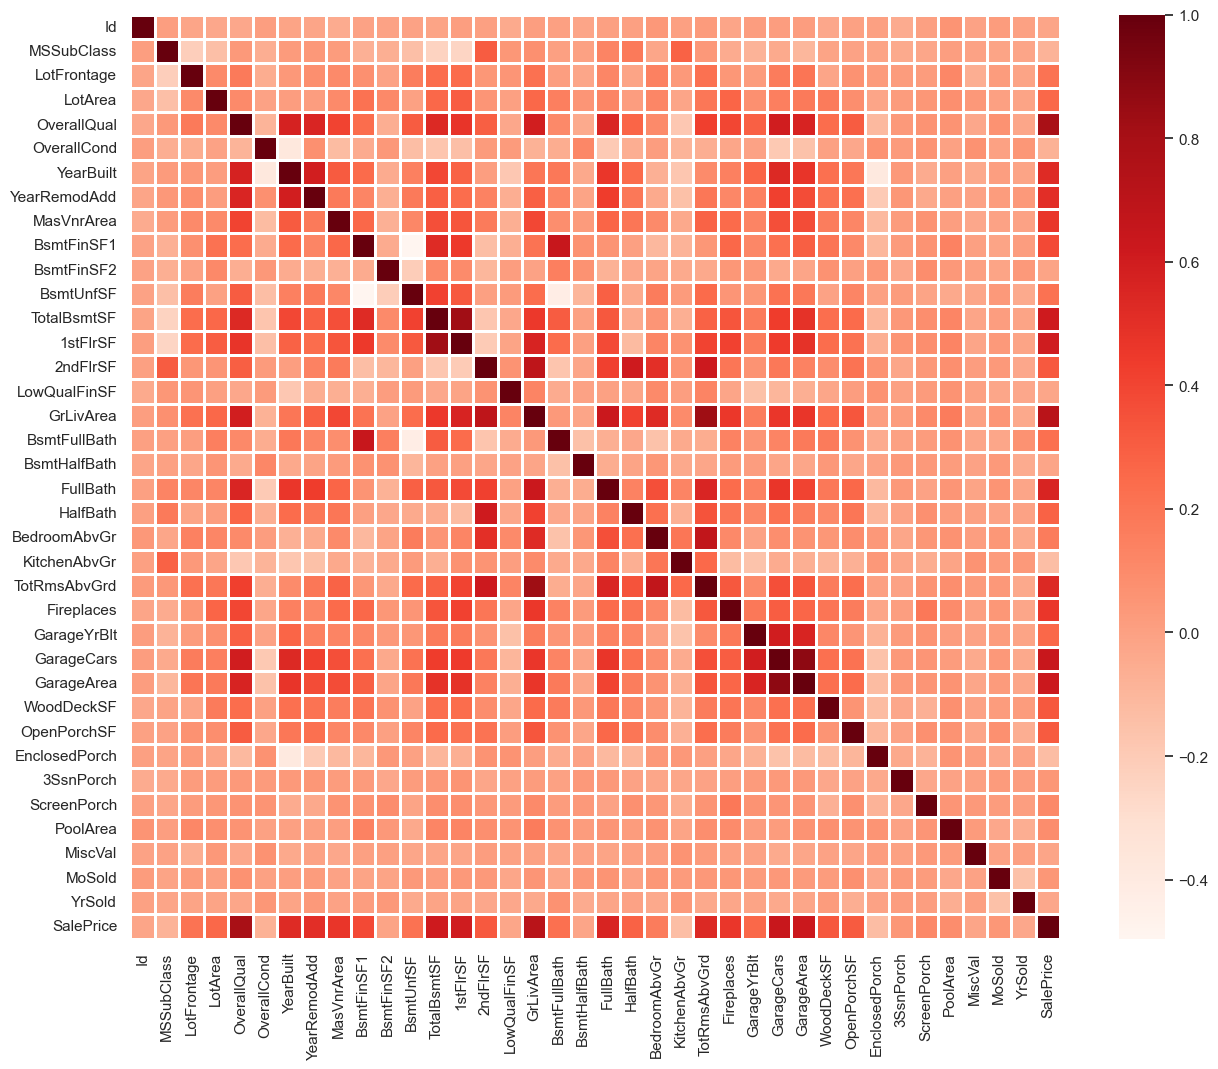

In [76]:
_show_heastmap(mcor)

In [46]:
dt_house.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object